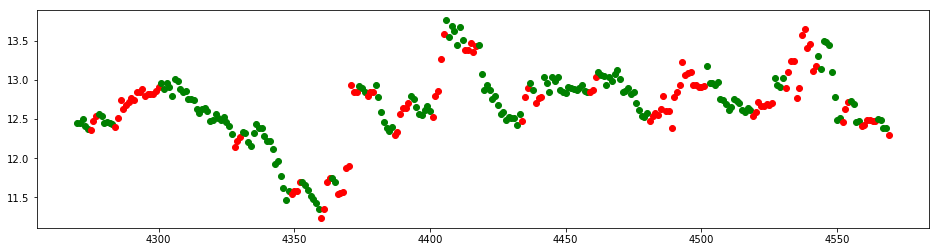

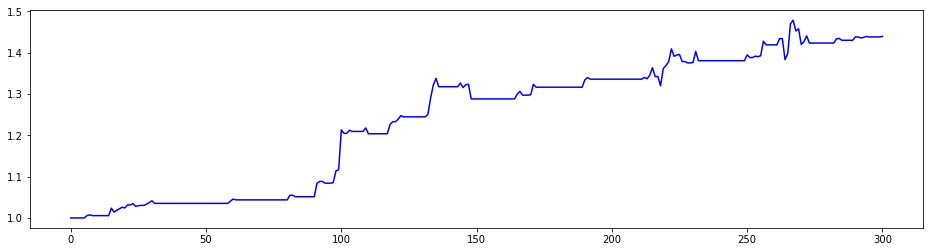

In [5]:
# Viterbi Algorithm(隐序列推测)
# O(Obvious-line):      the Obvious-line we got at last step 
# LM(Launch Matrix):    a 2*2 matrix to save launch probability
# CM(Change Matrix):    a 2*2 matrix to save change probability

import numpy as np

def Viterbi(O,LM,CM):
    LM = np.log(LM)
    CM = np.log(CM)
    pi=[[1,1]]
    for i in range (1,len(O)):
        pi.append([0,0])
        if O[i] == "R":
            pi[i][0] = LM[0][0]+max(pi[i-1][0]+CM[0][0],pi[i-1][1]+CM[1][0])
            pi[i][1] = LM[1][0]+max(pi[i-1][0]+CM[0][1],pi[i-1][1]+CM[1][1])
        else:
            pi[i][0] = LM[0][1]+max(pi[i-1][0]+CM[0][0],pi[i-1][1]+CM[1][0])
            pi[i][1] = LM[1][1]+max(pi[i-1][0]+CM[0][1],pi[i-1][1]+CM[1][1])
    
    if pi[len(O)-1][0] >= pi[len(O)-1][1]:
        H = "U";pr_H = "U"
    else:
        H = "D";pr_H = "D"
    
    for i in range (len(O)-2,-1,-1):
        if pr_H == "D":
            if pi[i][0]+CM[0][1] > pi[i][1]+CM[1][1]:
                pr_H="U"
            else:
                pr_H="D"
        if pr_H=="U":
            if pi[i][0]+CM[0][0] > pi[i][1]+CM[1][0]:
                pr_H="U"
            else:
                pr_H="D"
        H=pr_H+H
        
    return H

import csv
Data = []
with open('600000.csv','rb') as ff:
    reader = csv.reader(ff)
    for row in reader:
        Data.append(row)
O = ""
Price = []
Rate0 = []
for i in range(len(Data)-2):
    if(Data[i+2][4]!="null" and Data[i+1][4]!="null"):
        Price.append(Data[i+1][4])
        Rate0.append(float(Data[i+2][4])/float(Data[i+1][4]))
        if (float(Data[i+2][4])-float(Data[i+1][4])>=0):
            O = O + "R"
        else:
            O = O + "G"
            
import matplotlib.pyplot as plt
days = 300
Hdline = Viterbi(O,[[0.6, 0.4], [0.4, 0.6]],[[0.6, 0.4], [0.4, 0.6]])
fig, ax = plt.subplots(figsize=(16, 4))
for i in range (len(O)-days-1,len(O)-1):
    if Hdline[i] == "U":
        ax.plot([i],[Price[i]],'ro')
    elif Hdline[i] == "D":
        ax.plot([i],[Price[i]],'go')
plt.show()
#图像化显示计算出的涨跌区间

fig, ax = plt.subplots(figsize=(16, 4))
Price_my = [1]
flag = False
for i in range (len(O)-days,len(O)):
    if flag == False:
        Price_my.append(Price_my[len(Price_my)-1]*1.0)
    else:
        Price_my.append(Price_my[len(Price_my)-1]*Rate0[i])
    if Hdline[i-1] == "U" and  Hdline[i] == "D":
        flag = False
    elif Hdline[i-1] == "D" and Hdline[i] == "U":
        flag = True
ax.plot(Price_my,'b')
#Price_my = [1]
#for i in range (1,len(O[0:days])+1):
#    if O[i] == 'R':
#        Price_my.append(Price_my[len(Price_my)-1]*Rate0[i])
#    else:
#        Price_my.append(Price_my[len(Price_my)-1]*1.0)
#ax.plot(Price_my,'k')
plt.show()
#依照此涨跌去购买的收益曲线

In [54]:
import csv

def main(filename):
    Data = []
    with open(filename,'rb') as ff:
        reader = csv.reader(ff)
        for row in reader:
            Data.append(row)
    O = ""
    Price = []
    Rate0 = []
    for i in range(len(Data)-2):
        if(Data[i+2][4]!="null" and Data[i+1][4]!="null"):
            Price.append(Data[i+1][4])
            Rate0.append(float(Data[i+2][4])/float(Data[i+1][4]))
            if (float(Data[i+2][4])-float(Data[i+1][4])>=0):
                O = O + "R"
            else:
                O = O + "G"
            
    days = 300
    Hdline = Viterbi(O,[[0.6, 0.4], [0.4, 0.6]],[[0.6, 0.4], [0.4, 0.6]])

    Price_my = 1
    flag = False
    for i in range (len(O)-days,len(O)):
        if flag == False:
            Price_my = Price_my*1.0
        else:
            Price_my = Price_my*Rate0[i]
        if Hdline[i-1] == "U" and  Hdline[i] == "D":
            flag = False
        elif Hdline[i-1] == "D" and Hdline[i] == "U":
            flag = True
    print("%-11.6s %-11.2f %-11.2f %-11.2f"%(filename,round(Price_my,2),float(Data[len(O)-1][4])/float(Data[len(O)-1-days][4]),right(O)))

In [53]:
def F(x):
    if x == 'U':
        return 0
    else:
        return 1
    
def f(x):
    if x == 'R':
        return 0
    else:
        return 1
def right(O):
    t_num=0
    f_num=0
    for i in range(len(O)-days,len(O)):
        if f(O[i]) == F(Hdline[i]):
            t_num=t_num+1
        else:
            f_num=f_num+1
    return float(t_num)/float(f_num+t_num)

def result(f_list):
    print("%-15s %-15s %-15s %-15s"%("股票代码","投资收益","实际涨幅","准确率"))
    for i in range (len(f_list)):
        main(f_list[i])

In [57]:
result(['600000.csv','600004.csv','600288.csv','600318.csv','600519.csv'])

股票代码    投资收益    实际涨幅    准确率      
600000      1.44        0.97        0.78       
600004      2.12        1.62        0.48       
600288      2.16        0.57        0.49       
600318      1.40        0.78        0.48       
600519      2.33        1.85        0.51       
